In [242]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd

In [243]:
df = pd.read_csv("irrigation_plan.csv")
df

,Crop,Days,Moisture,Temperature,Humidity,Irrigation
0,Wheat,10,400,30,15,0
1,Wheat,7,200,30,32,0
2,Wheat,9,300,21,28,0
3,Wheat,3,500,40,22,0
4,Wheat,2,700,23,34,0
...,...,...,...,...,...,...
496,Coffee,93,675,25,19,1
497,Coffee,95,210,23,17,0
498,Coffee,97,398,25,18,0
499,Coffee,99,678,24,18,1


In [244]:
X = df.drop(['Irrigation'], axis='columns')
y = df['Irrigation']

In [245]:
label_encoder = LabelEncoder()
X['Crop'] = label_encoder.fit_transform(X['Crop'])

y = to_categorical(y, 2)

In [246]:
display(X, X.shape)
display(y, y.shape)

,Crop,Days,Moisture,Temperature,Humidity
0,8,10,400,30,15
1,8,7,200,30,32
2,8,9,300,21,28
3,8,3,500,40,22
4,8,2,700,23,34
...,...,...,...,...,...
496,0,93,675,25,19
497,0,95,210,23,17
498,0,97,398,25,18
499,0,99,678,24,18


(501, 5)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

(501, 2)

In [247]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50)

In [248]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [249]:
model = Sequential()
model.add(Input(shape=(len(X.columns),)))
model.add(Dense(32, kernel_initializer="uniform", activation='relu'))
model.add(Dense(32, kernel_initializer="uniform", activation='relu'))
model.add(Dense(2, kernel_initializer="uniform", activation='softmax'))

In [250]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [251]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)

In [252]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Test loss: 0.1557333916425705
Test accuracy: 0.9210526347160339


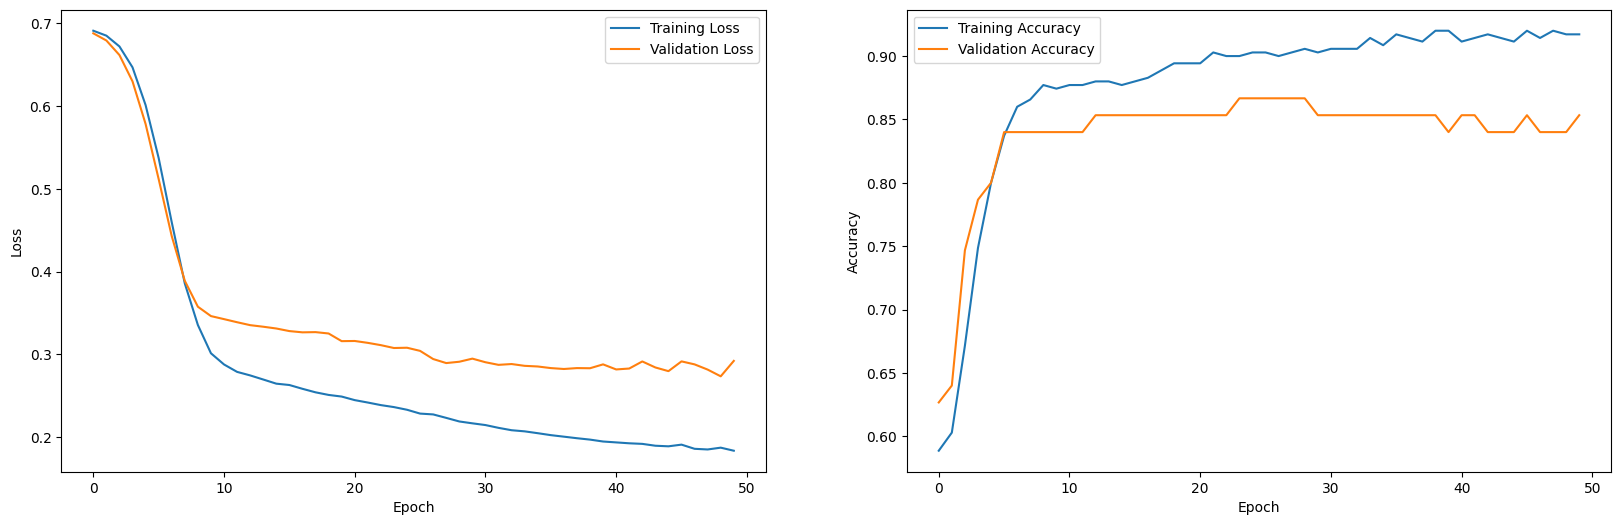

In [253]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()